<a href="https://colab.research.google.com/github/ramakrishnabhavana/dl-practice/blob/main/DL_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#week1

In [ ]:
pip install keras

In [ ]:
#Simple Neural Network with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
x = torch.randn(100, 3)
y = torch.randn(100, 1)
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)
    def forward(self, x):
        return self.linear(x)
model = SimpleNet()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=0.01
)
for epoch in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print("Final loss:", loss.item())

Final loss: 0.8709965348243713


In [ ]:
# Simple Neural Network with TensorFlow
import tensorflow as tf
x = tf.random.normal((100, 3))
y = tf.random.normal((100, 1))
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,
                          input_shape=(3,))
])
model.compile(optimizer='adam',             # Configures the Adam optimizer for training
              loss='mse')

# Train model
model.fit(x, y,                             # Trains the model using input and target data
          epochs=100,                       # Number of training iterations over the dataset
          verbose=0)                        # Suppresses training progress output

print("Final loss:",                       # Prints a message label
      model.evaluate(x, y))                # Evaluates the trained model on the same dataset

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.3640
Final loss: 1.551206350326538


In [ ]:
# IMPLEMENT A SIMPLE PERCEPTRON (Coding a Neuron)

import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [ ]:
#AND gate
import numpy as np
def step(x):
    return 1 if x >= 0 else 0

class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return step(total)
weights = np.array([1, 1])
bias = -1.5
and_gate = Perceptron(weights, bias)

print("AND Gate")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    print(x, "->", and_gate.predict(np.array(x)))

AND Gate
(0, 0) -> 0
(0, 1) -> 0
(1, 0) -> 0
(1, 1) -> 1


In [ ]:
#OR Gate
weights = np.array([1,1])
bias=-0.5
or_gate=Perceptron(weights,bias)
print("\nOR Gate")
for x in [(0,0),(0,1),(1,0),(1,1)]:
  print(x,"->",or_gate.predict(np.array(x)))


OR Gate
(0, 0) -> 0
(0, 1) -> 1
(1, 0) -> 1
(1, 1) -> 1


In [ ]:
#xor using step activation
import numpy as np
def step(x):
  return 1 if x>=0 else 0
class XOR_network:
  def __init__(self):
    self.w_or = np.array([1,1])
    self.b_or = -0.5
    self.w_and = np.array([1,1])
    self.b_and = -1.5
    self.w_out=np.array([1,-2])
    self.b_out= -0.5
  def predict(self,x):
    h1 = step(np.dot(self.w_or,x)+self.b_or)
    h2 = step(np.dot(self.w_and,x)+self.b_and)
    output = step(self.w_out[0]*h1 + self.w_out[1]*h2 + self.b_out)
    return output
class NOT_gate:
    def __init__(self):
        self.w = -1
        self.b = 0.5
    def predict(self, x):
        return step(self.w * x + self.b)
xor = XOR_network()
not_gate = NOT_gate()
print("XOR and ¬XOR Gates")
for x in [(0,0), (0,1), (1,0), (1,1)]:
    xor_out = xor.predict(np.array(x))
    not_xor_out = not_gate.predict(xor_out)
    print(f"{x} -> XOR: {xor_out}, ¬XOR: {not_xor_out}")

XOR and ¬XOR Gates
(0, 0) -> XOR: 0, ¬XOR: 1
(0, 1) -> XOR: 1, ¬XOR: 0
(1, 0) -> XOR: 1, ¬XOR: 0
(1, 1) -> XOR: 0, ¬XOR: 1


In [ ]:
#XOR Training Using Gradient Descent
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])
np.random.seed(42)
W1 = np.random.rand(2, 2)
b1 = np.random.rand(1, 2)
W2 = np.random.rand(2, 1)
b2 = np.random.rand(1, 1)
learning_rate = 0.1
epochs = 10000
for epoch in range(epochs):
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)
    error = y - y_pred
    loss = np.mean(error ** 2)
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
print("\nXOR Predictions after Training:")
for i in range(len(X)):
    print(X[i], "->", round(y_pred[i][0]))



Epoch 0, Loss: 0.3247
Epoch 1000, Loss: 0.2406
Epoch 2000, Loss: 0.1960
Epoch 3000, Loss: 0.1207
Epoch 4000, Loss: 0.0305
Epoch 5000, Loss: 0.0125
Epoch 6000, Loss: 0.0074
Epoch 7000, Loss: 0.0051
Epoch 8000, Loss: 0.0038
Epoch 9000, Loss: 0.0031

XOR Predictions after Training:
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0


#WEEK 2

In [ ]:
#demonstrate thresholding is harsh
import numpy as np
def step(x):
  return 1 if x >= 0 else 0
class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias
  def feedforward(self, inputs):
    total = np.dot(self.weights, inputs) + self.bias
    return step(total)
weights = np.array([0, 1])
b_1 = -3.1
b_2 = 2
b_3 = -3.0
n = Neuron(weights, b_1)
n_2 = Neuron(weights, b_2)
n_3 = Neuron(weights,b_3)
x = np.array([2, 3])
print("with bias -3.1:",n.feedforward(x))
print("\nwith bias -3.0:",n_3.feedforward(x))
print("\nwith bias 2:",n_2.feedforward(x))

with bias -3.1: 0

with bias -3.0: 1

with bias 2: 1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
dl = pd.read_csv("/content/dl-week2 - Sheet1.csv")
X = dl['f1','f2','f3','f4']
y=dl['output'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

def step(z):
  return 1 if z>=0 else 0


In [ ]:
# XOR and XNOR implementation using a Multi-Perceptron Network

# Step activation function
def step(x):
    return 1 if x >= 0 else 0

# Hidden layer perceptrons
def OR(x1, x2):
    w1, w2, b = 1, 1, -0.5
    return step(w1*x1 + w2*x2 + b)

def AND(x1, x2):
    w1, w2, b = 1, 1, -1.5
    return step(w1*x1 + w2*x2 + b)

# XOR using multi-perceptron
def XOR(x1, x2):
    h1 = OR(x1, x2)
    h2 = AND(x1, x2)
    w1, w2, b = 1, -2, -0.5
    return step(w1*h1 + w2*h2 + b)

# XNOR (NOT XOR)
def XNOR(x1, x2):
    return 1 - XOR(x1, x2)

# Testing the network
print("X1 X2 XOR XNOR")
for x1 in [0, 1]:
    for x2 in [0, 1]:
        print(x1, x2, " ", XOR(x1, x2), " ", XNOR(x1, x2))

X1 X2 XOR XNOR
0 0   0   1
0 1   1   0
1 0   1   0
1 1   0   1


In [ ]:
import pandas as pd
import numpy as np

# -------------------------------------------------------
# STEP 1: Create a small movie dataset and save as CSV
# -------------------------------------------------------

data = {
    "MattDamon": [1, 0, 1, 0, 1, 0, 1, 0],
    "Thriller":  [1, 1, 0, 0, 1, 0, 0, 1],
    "Nolan":     [0, 1, 0, 1, 1, 0, 0, 1],
    "IMDB":      [0.9, 0.8, 0.6, 0.4, 0.85, 0.3, 0.7, 0.5],
    "Like":      [1, 1, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)
df.to_csv("movies.csv", index=False)

print("Movie Dataset:")
print(df)

X = df.drop("Like", axis=1).values
y = df["Like"].values

# -------------------------------------------------------
# STEP 2: Activation Function
# -------------------------------------------------------

def step(x):
    return 1 if x >= 0 else 0

# -------------------------------------------------------
# i) MP Perceptron (No weights, No bias)
# -------------------------------------------------------

def mp_perceptron_predict(x):
    return step(np.sum(x))   # equal importance to all features

print("\n--- MP Perceptron (No weights, No bias) ---")
for i, x in enumerate(X):
    print(f"Actual: {y[i]}  Predicted: {mp_perceptron_predict(x)}")

# -------------------------------------------------------
# ii) Perceptron with weights only (No bias)
# -------------------------------------------------------

def train_perceptron_no_bias(X, y, lr=0.1, epochs=10):
    w = np.zeros(X.shape[1])
    print("\nTraining Perceptron (Weights only)")
    for epoch in range(epochs):
        errors = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w))
            error = y[i] - y_pred
            if error != 0:
                w = w + lr * error * X[i]
                errors += 1
        print(f"Epoch {epoch+1}, Weights: {w}, Errors: {errors}")
        if errors == 0:
            break
    return w

w_no_bias = train_perceptron_no_bias(X, y)

# -------------------------------------------------------
# iii) Perceptron with weights and bias
# -------------------------------------------------------

def train_perceptron_with_bias(X, y, lr=0.1, epochs=10):
    w = np.zeros(X.shape[1])
    b = 0
    print("\nTraining Perceptron (Weights + Bias)")
    for epoch in range(epochs):
        errors = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w) + b)
            error = y[i] - y_pred
            if error != 0:
                w = w + lr * error * X[i]
                b = b + lr * error
                errors += 1
        print(f"Epoch {epoch+1}, Weights: {w}, Bias: {b}, Errors: {errors}")
        if errors == 0:
            break
    return w, b

w_bias, b_bias = train_perceptron_with_bias(X, y)

# -------------------------------------------------------
# STEP 3: Test with a sample movie
# -------------------------------------------------------

sample_movie = np.array([1, 1, 0, 0.8])  # Matt Damon, Thriller, Not Nolan, High IMDB

print("\n--- Testing Sample Movie ---")
print("Sample features:", sample_movie)

print("MP Perceptron Prediction:", mp_perceptron_predict(sample_movie))
print("Perceptron (Weights only):", step(np.dot(sample_movie, w_no_bias)))
print("Perceptron (Weights + Bias):", step(np.dot(sample_movie, w_bias) + b_bias))

Movie Dataset:
   MattDamon  Thriller  Nolan  IMDB  Like
0          1         1      0  0.90     1
1          0         1      1  0.80     1
2          1         0      0  0.60     1
3          0         0      1  0.40     0
4          1         1      1  0.85     1
5          0         0      0  0.30     0
6          1         0      0  0.70     1
7          0         1      1  0.50     0

--- MP Perceptron (No weights, No bias) ---
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Actual: 1  Predicted: 1
Actual: 0  Predicted: 1
Actual: 1  Predicted: 1
Actual: 0  Predicted: 1
Actual: 1  Predicted: 1
Actual: 0  Predicted: 1

Training Perceptron (Weights only)
Epoch 1, Weights: [ 0.1    0.    -0.1   -0.035], Errors: 4
Epoch 2, Weights: [ 0.1    0.1   -0.1   -0.025], Errors: 3
Epoch 3, Weights: [ 0.1    0.1   -0.2   -0.065], Errors: 4
Epoch 4, Weights: [ 0.1    0.1   -0.2   -0.065], Errors: 3
Epoch 5, Weights: [ 0.1    0.1   -0.2   -0.065], Errors: 3
Epoch 6, Weights: [ 0.1    0.1   -0.2  

#WEEK-3

In [ ]:
import numpy as np

# Input patterns
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# All 16 Boolean functions (outputs)
boolean_functions = {
    "f1":  [0,0,0,0],
    "f2":  [0,0,0,1],   # AND
    "f3":  [0,0,1,0],
    "f4":  [0,0,1,1],
    "f5":  [0,1,0,0],
    "f6":  [0,1,0,1],
    "f7":  [0,1,1,0],   # XOR
    "f8":  [0,1,1,1],
    "f9":  [1,0,0,0],
    "f10": [1,0,0,1],   # XNOR
    "f11": [1,0,1,0],
    "f12": [1,0,1,1],
    "f13": [1,1,0,0],
    "f14": [1,1,0,1],
    "f15": [1,1,1,0],
    "f16": [1,1,1,1]
}

# Step function
def step(x):
    return 1 if x >= 0 else 0

# Train single perceptron
def train_perceptron(X, y, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])
    b = 0

    for _ in range(epochs):
        error_count = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w) + b)
            error = y[i] - y_pred
            if error != 0:
                w += lr * error * X[i]
                b += lr * error
                error_count += 1
        if error_count == 0:
            return True   # Converged

    return False  # Did not converge

# Test all Boolean functions
not_learnable = []

print("Perceptron Learning Results:\n")

for fname, outputs in boolean_functions.items():
    y = np.array(outputs)
    converged = train_perceptron(X, y)
    result = "Learnable" if converged else "NOT Learnable"
    print(f"{fname}: {result}")
    if not converged:
        not_learnable.append(fname)

print("\nSummary:")
print("Total Boolean functions:", len(boolean_functions))
print("Learnable:", len(boolean_functions) - len(not_learnable))
print("Not Learnable:", len(not_learnable))
print("Not Learnable Functions:", not_learnable)

Perceptron Learning Results:

f1: Learnable
f2: Learnable
f3: Learnable
f4: Learnable
f5: Learnable
f6: Learnable
f7: NOT Learnable
f8: Learnable
f9: Learnable
f10: NOT Learnable
f11: Learnable
f12: Learnable
f13: Learnable
f14: Learnable
f15: Learnable
f16: Learnable

Summary:
Total Boolean functions: 16
Learnable: 14
Not Learnable: 2
Not Learnable Functions: ['f7', 'f10']


Implement an MLP by varying bias, weights, and learning rate, and record observations for different learning rate values. Plot a graph showing the relationship between loss (error) and learning rate.

Learning Rate: 0.01, Final Loss: 0.240571
Learning Rate: 0.05, Final Loss: 0.012541
Learning Rate: 0.1, Final Loss: 0.002546
Learning Rate: 0.5, Final Loss: 0.000293
Learning Rate: 1.0, Final Loss: 0.000135


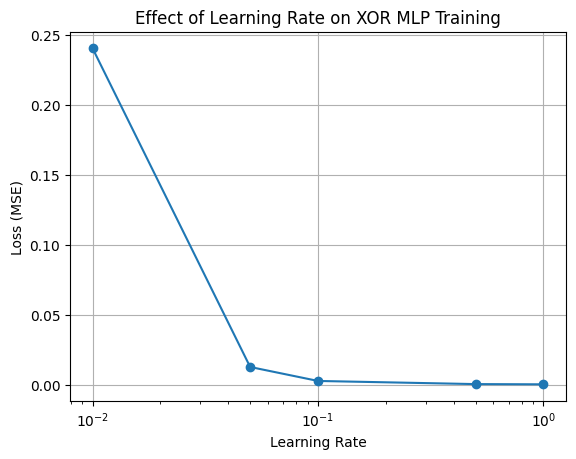

In [7]:
# MLP for XOR – Effect of Learning Rate on Loss
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
final_losses = []
epochs = 10000
for lr in learning_rates:
    np.random.seed(42)
    W1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)
    W2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)
    for epoch in range(epochs):
        hidden_input = np.dot(X, W1) + b1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + b2
        y_pred = sigmoid(final_input)
        error = y - y_pred
        loss = np.mean(error ** 2)
        d_output = error * sigmoid_derivative(y_pred)
        d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)
        W2 += hidden_output.T.dot(d_output) * lr
        b2 += np.sum(d_output, axis=0, keepdims=True) * lr
        W1 += X.T.dot(d_hidden) * lr
        b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    final_losses.append(loss)
    print(f"Learning Rate: {lr}, Final Loss: {loss:.6f}")
plt.figure()
plt.plot(learning_rates, final_losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Loss (MSE)")
plt.title("Effect of Learning Rate on XOR MLP Training")
plt.xscale("log")
plt.grid(True)
plt.show()

Epoch 1000, Loss: 0.244429
Epoch 2000, Loss: 0.203598
Epoch 3000, Loss: 0.153406
Epoch 4000, Loss: 0.046398
Epoch 5000, Loss: 0.015627
Epoch 6000, Loss: 0.008452
Epoch 7000, Loss: 0.005615
Epoch 8000, Loss: 0.004148
Epoch 9000, Loss: 0.003264
Epoch 10000, Loss: 0.002679

--- XOR Predictions ---
Input: [0 0] -> Predicted: 0, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 1, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0


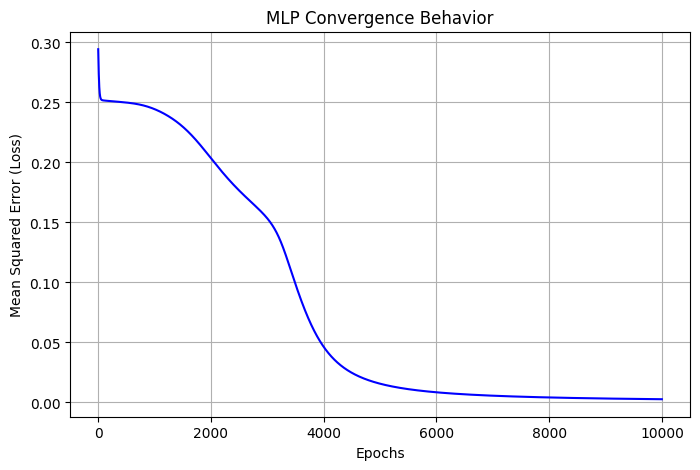


--- Performance Metrics ---
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00


In [ ]:
# 10
# Implement an MLP using the Gradient Descent algorithm, and analyze the convergence behavior and performance of the network.

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Dataset: XOR problem
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([[0], [1], [1], [0]])

# -----------------------------
# Activation Functions
# -----------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# -----------------------------
# MLP Parameters
# -----------------------------
input_neurons = 2
hidden_neurons = 2
output_neurons = 1
learning_rate = 0.1
epochs = 10000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.random.randn(1, hidden_neurons)
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.random.randn(1, output_neurons)

# -----------------------------
# Training with Gradient Descent
# -----------------------------
loss_history = []

for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    y_pred = sigmoid(final_input)

    # Compute Mean Squared Error loss
    error = y - y_pred
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Backpropagation
    d_output = error * sigmoid_derivative(y_pred)
    d_hidden = d_output.dot(W2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Optional: print loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss:.6f}")

# -----------------------------
# Testing the trained MLP
# -----------------------------
hidden_output = sigmoid(np.dot(X, W1) + b1)
y_pred_final = sigmoid(np.dot(hidden_output, W2) + b2)
predictions = (y_pred_final >= 0.5).astype(int)

print("\n--- XOR Predictions ---")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

# -----------------------------
# Plot convergence (Loss vs Epochs)
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history, color='blue')
plt.title("MLP Convergence Behavior")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.show()

# -----------------------------
# Performance Metrics
# -----------------------------
TP = np.sum((y == 1) & (predictions == 1))
TN = np.sum((y == 0) & (predictions == 0))
FP = np.sum((y == 0) & (predictions == 1))
FN = np.sum((y == 1) & (predictions == 0))

accuracy = (TP + TN) / len(y)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

print("\n--- Performance Metrics ---")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")


In [ ]:
import numpy as np
# Input patterns
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# All 16 Boolean functions (outputs)
boolean_functions = {
    "f1":  [0,0,0,0],
    "f2":  [0,0,0,1],   # AND
    "f3":  [0,0,1,0],
    "f4":  [0,0,1,1],
    "f5":  [0,1,0,0],
    "f6":  [0,1,0,1],
    "f7":  [0,1,1,0],   # XOR
    "f8":  [0,1,1,1],
    "f9":  [1,0,0,0],
    "f10": [1,0,0,1],   # XNOR
    "f11": [1,0,1,0],
    "f12": [1,0,1,1],
    "f13": [1,1,0,0],
    "f14": [1,1,0,1],
    "f15": [1,1,1,0],
    "f16": [1,1,1,1]
}
# Step function
def step(x):
    return 1 if x >= 0 else 0
# Train single perceptron
def train_perceptron(X, y, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        error_count = 0
        for i in range(len(X)):
            y_pred = step(np.dot(X[i], w) + b)
            error = y[i] - y_pred
            if error != 0:
                w += lr * error * X[i]
                b += lr * error
                error_count += 1
        if error_count == 0:
            return True   # Converged

    return False  # Did not converge
# Test all Boolean functions
not_learnable = []
print("Perceptron Learning Results:\n")
for fname, outputs in boolean_functions.items():
    y = np.array(outputs)
    converged = train_perceptron(X, y)
    result = "Learnable" if converged else "NOT Learnable"
    print(f"{fname}: {result}")
    if not converged:
        not_learnable.append(fname)
print("\nSummary:")
print("Total Boolean functions:", len(boolean_functions))
print("Learnable:", len(boolean_functions) - len(not_learnable))
print("Not Learnable:", len(not_learnable))
print("Not Learnable Functions:", not_learnable)

Perceptron Learning Results:

f1: Learnable
f2: Learnable
f3: Learnable
f4: Learnable
f5: Learnable
f6: Learnable
f7: NOT Learnable
f8: Learnable
f9: Learnable
f10: NOT Learnable
f11: Learnable
f12: Learnable
f13: Learnable
f14: Learnable
f15: Learnable
f16: Learnable

Summary:
Total Boolean functions: 16
Learnable: 14
Not Learnable: 2
Not Learnable Functions: ['f7', 'f10']


In [2]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Create a Perceptron object
perceptron = Perceptron()

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train)

# Use the trained Perceptron to make predictions on the testing data
y_pred = perceptron.predict(X_test)

# Evaluate the accuracy of the Perceptron
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training shape: (54000, 784)
Testing shape: (6000, 784)
Iteration 1, loss = 0.54125506
Iteration 2, loss = 0.26261541
Iteration 3, loss = 0.21334693
Iteration 4, loss = 0.18041799
Iteration 5, loss = 0.15521071
Iteration 6, loss = 0.13713162
Iteration 7, loss = 0.12167082
Iteration 8, loss = 0.10957409
Iteration 9, loss = 0.09910434
Iteration 10, loss = 0.09005121
Iteration 11, loss = 0.08238981
Iteration 12, loss = 0.07590413
Iteration 13, loss = 0.06990400
Iteration 14, loss = 0.06552830
Iteration 15, loss = 0.06068202
Iteration 16, loss = 0.05696692
Iteration 17, loss = 0.05327114
Iteration 18, loss = 0.04979526
Iteration 19, loss = 0.04618848
Iteration 20, loss = 0.04420099
Iteration 21, loss = 0.04145133
Iteration 22, loss = 0.03863193
Iteration 23, loss = 0.03670778
Iteration 24, loss = 0.03395817
Iteration 25, loss = 0.03256089
Iteration 26, loss = 0.03003133
Iteration 27, loss = 0.02852477
Iteration 28, loss = 0.02670121
Iterat

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.9996666666666667
Testing set score: 0.974
Predicted value: 6
Actual value: 6


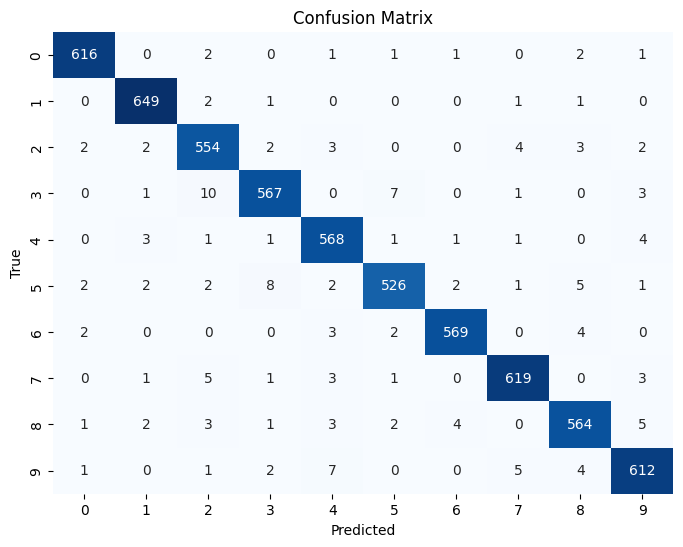

Iteration 1, loss = 0.58402398
Iteration 2, loss = 0.38397781
Iteration 3, loss = 0.39906015
Iteration 4, loss = 0.39794427
Iteration 5, loss = 0.42552618
Iteration 6, loss = 0.42483506
Iteration 7, loss = 0.43145128
Iteration 8, loss = 0.42965931
Iteration 9, loss = 0.48689868
Iteration 10, loss = 0.43131150
Iteration 11, loss = 0.44657347
Iteration 12, loss = 0.44554835
Iteration 13, loss = 0.43811670
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score (MLP2): 0.8982037037037037
Testing set score (MLP2): 0.8838333333333334


In [3]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()
# Normalize data
X_train_full = X_train_full / 255.0
X_test_full  = X_test_full / 255.0
# Flatten images (28x28 -> 784)
X_train_full = X_train_full.reshape(-1, 28*28)
X_test_full  = X_test_full.reshape(-1, 28*28)
# Train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_full,
    y_train_full,
    test_size=0.10,
    random_state=42
)
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
# Train MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    verbose=1,
    random_state=1
)
mlp.fit(X_train, y_train)
# Accuracy
print("Training set score:", mlp.score(X_train, y_train))
print("Testing set score:", mlp.score(X_test, y_test))
# Test single sample
index = 346
test_digit = X_test[index].reshape(1, 784)
prediction = mlp.predict(test_digit)[0]
print("Predicted value:", prediction)
print("Actual value:", y_test[index])
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
preds = mlp.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
# MLP with higher learning rate
mlp2 = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=50,
    verbose=1,
    random_state=1,
    learning_rate_init=0.1
)
mlp2.fit(X_train, y_train)
print("Training set score (MLP2):", mlp2.score(X_train, y_train))
print("Testing set score (MLP2):", mlp2.score(X_test, y_test))

In [4]:
pip install altair

#WEEK 4

In [1]:
#USING OPTIMIZATION ALGO
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt
# expected values
y = np.array([[0, 1, 1, 0]]).T
# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T
model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy', 'mean_squared_error'])
history = model.fit(X, y, epochs=1000, verbose=0)
errors = history.history['loss']
df2 = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
alt.Chart(df2).mark_line().encode(x="time-step", y="errors").properties(title='Chart 3')
y_pred = model.predict(X).round()
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Multi-layer perceptron accuracy: 100.00%


In [17]:
# Using SGD Optimizer
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt
from tensorflow.keras.optimizers import SGD

# expected values
y = np.array([[0, 1, 1, 0]]).T

# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T

model_sgd = Sequential()
model_sgd.add(Dense(16, input_dim=2, activation='sigmoid'))
model_sgd.add(Dense(1, activation='sigmoid'))

model_sgd.compile(loss='mean_squared_error',
                  optimizer=SGD(),
                  metrics=['binary_accuracy', 'mean_squared_error'])

history_sgd = model_sgd.fit(X, y, epochs=1000, verbose=0)

errors_sgd = history_sgd.history['loss']

df_sgd = pd.DataFrame({"errors": errors_sgd, "time-step": np.arange(0, len(errors_sgd))})

# Visualization with Altair for SGD optimizer
alt.Chart(df_sgd).mark_line().encode(x="time-step", y="errors").properties(title='SGD Optimizer - Loss Curve')

# Predictions and Accuracy
y_pred_sgd = model_sgd.predict(X).round()
num_correct_predictions_sgd = (y_pred_sgd == y).sum()
accuracy_sgd = (num_correct_predictions_sgd / y.shape[0]) * 100
print('SGD Optimizer accuracy: %.2f%%' % accuracy_sgd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
SGD Optimizer accuracy: 50.00%


In [18]:
# Using SGD Optimizer on Fashion-MNIST

import numpy as np
import pandas as pd
import altair as alt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the model
model_sgd = Sequential()
model_sgd.add(Flatten(input_shape=(28, 28)))
model_sgd.add(Dense(128, activation='relu'))
model_sgd.add(Dense(10, activation='softmax'))

# Compile model using SGD optimizer
model_sgd.compile(
    loss='categorical_crossentropy',
    optimizer=SGD(learning_rate=0.01),
    metrics=['accuracy']
)

# Train the model
history_sgd = model_sgd.fit(
    X_train,
    y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

# Extract loss values
errors_sgd = history_sgd.history['loss']

# Create DataFrame for visualization
df_sgd = pd.DataFrame({
    "errors": errors_sgd,
    "epoch": np.arange(1, len(errors_sgd) + 1)
})

# Visualization with Altair
alt.Chart(df_sgd).mark_line().encode(
    x="epoch",
    y="errors"
).properties(title="SGD Optimizer - Training Loss Curve (Fashion-MNIST)")
# Evaluate on test data
test_loss, test_accuracy = model_sgd.evaluate(X_test, y_test_cat, verbose=0)
print(f"SGD Optimizer Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5132 - loss: 1.5067 - val_accuracy: 0.7378 - val_loss: 0.7806
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7512 - loss: 0.7543 - val_accuracy: 0.7817 - val_loss: 0.6497
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7892 - loss: 0.6425 - val_accuracy: 0.8012 - val_loss: 0.5862
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8062 - loss: 0.5890 - val_accuracy: 0.8108 - val_loss: 0.5518
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8159 - loss: 0.5500 - val_accuracy: 0.8225 - val_loss: 0.5291
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8223 - loss: 0.5293 - val_accuracy: 0.8248 - val_loss: 0.5083
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8283 - loss: 0.5052 - val_accuracy: 0.8308 - val_loss: 0.4959
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8339 - loss: 0.4943 - val_accuracy: 0.

In [19]:
       # Using MGD (Momentum Gradient Descent) Optimizer
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt
from tensorflow.keras.optimizers import SGD
# expected values
y = np.array([[0, 1, 1, 0]]).T

# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T
model_mgd = Sequential()
model_mgd.add(Dense(16, input_dim=2, activation='sigmoid'))
model_mgd.add(Dense(1, activation='sigmoid'))

# Using Momentum in SGD
model_mgd.compile(loss='mean_squared_error',
                  optimizer=SGD(momentum=0.1),
                  metrics=['binary_accuracy', 'mean_squared_error'])
#momentum= 0.9 This parameter indicates how much of the previous update to consider when updating the current weight.
#momentum=0.9 would mean that 90% of the previous weight update is added to the current update, which can help the model converge more quickly.

history_mgd = model_mgd.fit(X, y, epochs=1000, verbose=0)

errors_mgd = history_mgd.history['loss']

df_mgd = pd.DataFrame({"errors": errors_mgd, "time-step": np.arange(0, len(errors_mgd))})

# Visualization with Altair for MGD optimizer
alt.Chart(df_mgd).mark_line().encode(x="time-step", y="errors").properties(title='MGD Optimizer - Loss Curve')

# Predictions and Accuracy
y_pred_mgd = model_mgd.predict(X).round()
num_correct_predictions_mgd = (y_pred_mgd == y).sum()
accuracy_mgd = (num_correct_predictions_mgd / y.shape[0]) * 100
print('MGD Optimizer accuracy: %.2f%%' % accuracy_mgd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
MGD Optimizer accuracy: 50.00%
